<a href="https://colab.research.google.com/github/Madhusudan-29/102116101_SESS_LE1/blob/main/102116101_Madhusudan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


dataset_path = '/content/SpeechCommands/speech_commands_v0.02'

commands = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
commands.sort()
print(f"Available Commands: {commands}")
print(f"Total Commands: {len(commands)}")


Available Commands: ['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']
Total Commands: 36


In [31]:
file_count_per_class = {command: len(os.listdir(os.path.join(dataset_path, command))) for command in commands}


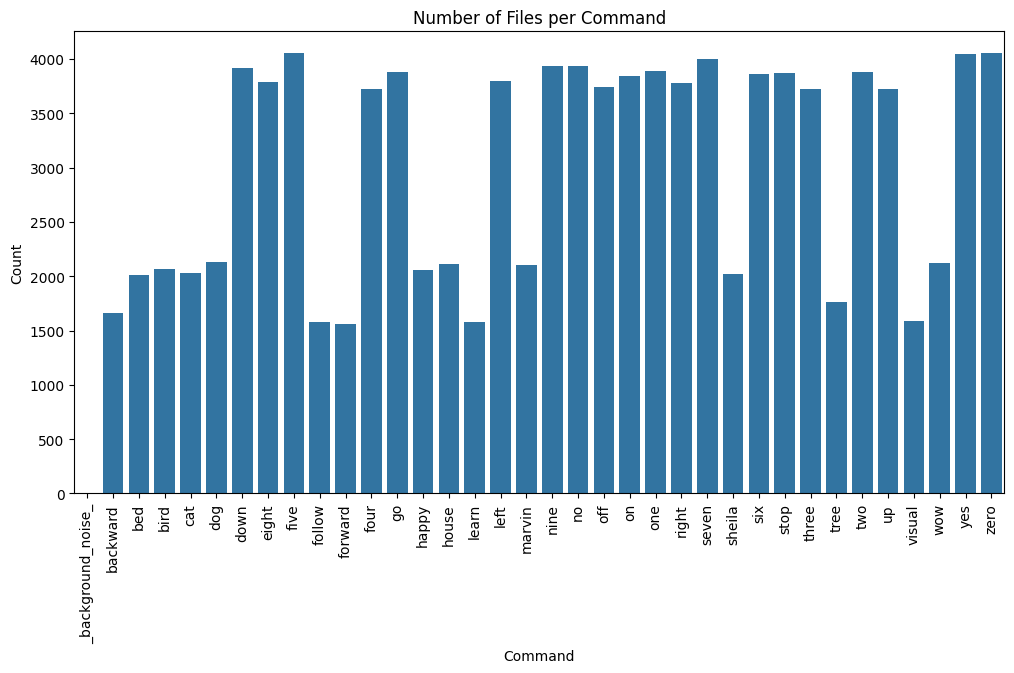

In [32]:
df_class_distribution = pd.DataFrame(list(file_count_per_class.items()), columns=['Command', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Command', y='Count', data=df_class_distribution)
plt.xticks(rotation=90)
plt.title('Number of Files per Command')
plt.show()

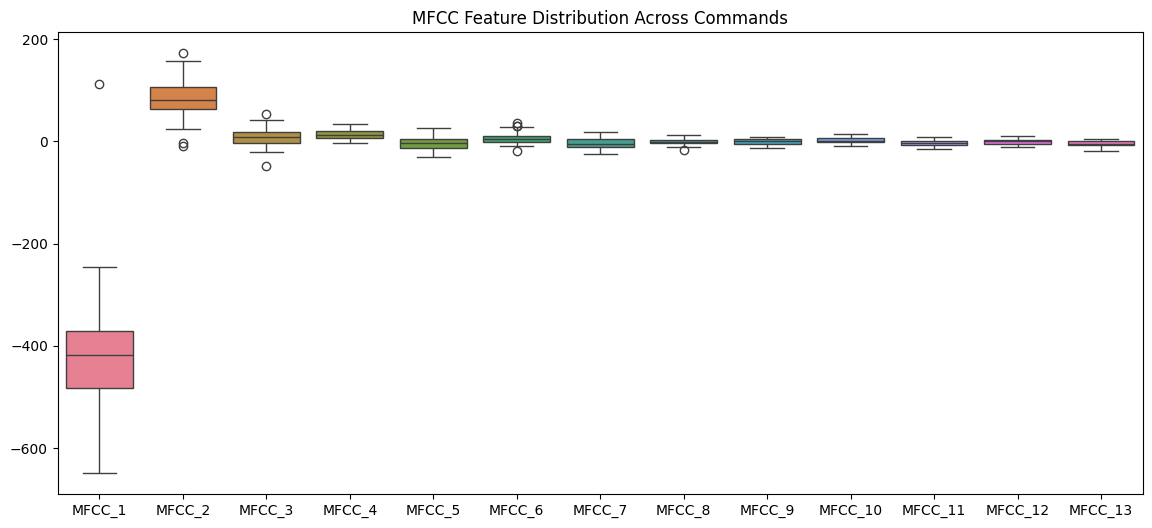

In [33]:
mfccs = []
labels = []

for command in commands:
    folder_path = os.path.join(dataset_path, command)
    file_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs.append(np.mean(mfcc, axis=1))
    labels.append(command)

df_mfcc = pd.DataFrame(mfccs, columns=[f'MFCC_{i}' for i in range(1, 14)])
df_mfcc['Label'] = labels

# Visualize MFCC distributions
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_mfcc.drop('Label', axis=1))
plt.title('MFCC Feature Distribution Across Commands')
plt.show()

In [68]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


SAMPLE_RATE = 16000  # 16kHz sampling rate
N_MFCC = 13          # Number of MFCC features
AUDIO_DURATION = 1   # 1 second duration
N_CLASSES = 10       # Number of commands to classify (you can adjust)

commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']


def load_audio_files(dataset_path, commands):
    X = []
    y = []
    for label in commands:
        folder_path = os.path.join(dataset_path, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            # Load the audio file and ensure it's the correct length
            y_audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=AUDIO_DURATION)
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=N_MFCC)
            mfcc = np.mean(mfcc.T, axis=0)  # Take mean across time
            X.append(mfcc)
            y.append(label)
    return np.array(X), np.array(y)

# Load data
X, y = load_audio_files(dataset_path, commands)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
X_train = X_train / np.max(np.abs(X_train), axis=0)
X_test = X_test / np.max(np.abs(X_test), axis=0)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (30836, 13)
Test set size: (7710, 13)


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple dense neural network
def build_model(input_shape, n_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model(X_train.shape[1], len(commands))

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,386 (177.29 KB)

 Trainable params: 45,386 (177.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4516 - loss: 1.5737 - val_accuracy: 0.4348 - val_loss: 1.5709
Epoch 2/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4455 - loss: 1.5684 - val_accuracy: 0.4384 - val_loss: 1.5717
Epoch 3/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4428 - loss: 1.5643 - val_accuracy: 0.4361 - val_loss: 1.5731
Epoch 4/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4454 - loss: 1.5623 - val_accuracy: 0.4347 - val_loss: 1.5744
Epoch 5/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4512 - loss: 1.5543 - val_accuracy: 0.4356 - val_loss: 1.5685
Epoch 6/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4490 - loss: 1.5611 - val_accuracy: 0.4371 - val_loss: 1.5700
Epoch 7/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4485 - loss: 1.5464 - val_accuracy: 0.4373 - val_loss: 1.5731
Epoch 8/10
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4581 - loss: 1.5514 - val_accuracy: 0.

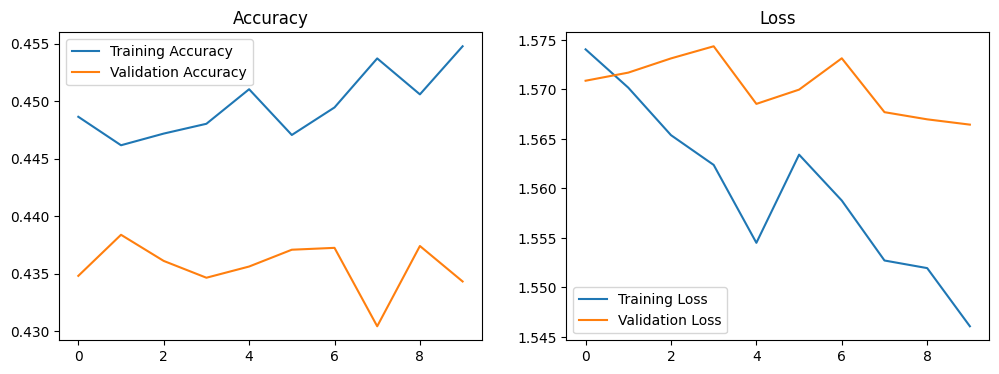

In [76]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=28, validation_split=0.20)

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
